In [1]:
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn; sns.set(rc={'figure.figsize':(12,10)})

pd.set_option('display.max_columns', 500)

# Data-loading

In [2]:
subscriptions_rds = pd.read_csv("subscriptions_mix.csv")
subscriptions_dtypes_modified = False

C:\Users\Raja\AppData\Local\Temp\ipykernel_9076\4161518358.py:1: DtypeWarning: Columns (4,6,10,13,16,18,20,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  subscriptions_rds = pd.read_csv("subscriptions_mix.csv")


In [3]:
transactions_rds = pd.read_csv("transactions_mix.csv")

C:\Users\Raja\AppData\Local\Temp\ipykernel_9076\1978939114.py:1: DtypeWarning: Columns (4,6,10,13,14,15,16,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  transactions_rds = pd.read_csv("transactions_mix.csv")


In [4]:
subscriptions_rds

,id,created_at,country,operator,service,source,msisdn,status,cycle,adnet,revenue,subs_date,renewal_date,freemium_end_date,unsubs_from,unsubs_date,service_price,currency,profile_status,publisher,trxid,pixel,handset,browser,attempt_charging,success_billing
0,302164,2023-09-13 09:47:57.713,TH,ais,459505104,sms,66988602911,0,daily,NaN,0,2022-10-20 19:28:02.000,2023-09-14 00:00:00.000,2022-10-20 00:00:00.000,NaN,NaN,6,BATH,Active,NaN,20230913070749401088.0,NaN,NaN,NaN,15,0
1,3521,2023-09-13 09:21:13.679,TH,ais,459505104,sms,66822243080,0,daily,NaN,0,2020-08-23 16:11:02.000,2023-09-14 00:00:00.000,2020-08-23 00:00:00.000,NaN,NaN,6,BATH,Active,NaN,20230913070724300800.0,NaN,NaN,NaN,15,0
2,1,2023-09-13 09:20:20.727,TH,ais,459505106,ivr,666131,0,1,NaN,6,2023-08-25 14:02:05.000,2023-08-26 00:00:00.000,2023-08-25 00:00:00.000,NaN,NaN,6,BATH,Active,NaN,20230825140205699072.0,NaN,NaN,NaN,1,1
3,4999335,2023-09-13 14:00:22.171,TH,ais,459505105,wap,66650020857,0,daily,star,0,2023-09-09 13:03:24.000,2023-09-14 00:00:00.000,2023-09-09 00:00:00.000,NaN,NaN,6,BATH,Active,star,20230913071052099584.0,star-APP1694223212644066,NaN,NaN,5,0
4,273196,2023-09-13 09:45:33.449,TH,ais,459505104,sms,66635959286,0,daily,NaN,0,2022-09-26 19:36:03.000,2023-09-14 00:00:00.000,2022-09-26 00:00:00.000,NaN,NaN,6,BATH,Active,NaN,20230913070115598336.0,NaN,NaN,NaN,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308906,22019,2023-09-14 06:55:36.464,OM,omantel,goaly,cp1,96898097014,0,daily,kee,0,2023-05-11 09:50:11.000,2023-05-11 09:50:26.000,NaN,NaN,0001-01-01 00:00:00.000,300,Rial,NaN,lumos,NaN,NaN,/,Apache-HttpClient,1,0
308907,22037,2023-09-14 06:55:36.475,OM,omantel,goaly,cp1,96872209910,0,daily,kee,0,2023-05-11 09:49:50.000,2023-05-11 09:50:09.000,NaN,NaN,0001-01-01 00:00:00.000,300,Rial,NaN,lumos,NaN,NaN,/,Apache-HttpClient,1,0
308908,22062,2023-09-14 06:55:36.485,OM,omantel,goaly,cp1,96891448321,0,daily,kee,0,2023-05-11 06:15:24.000,2023-05-11 06:15:52.000,NaN,NaN,0001-01-01 00:00:00.000,300,Rial,NaN,lumos,NaN,NaN,/,Apache-HttpClient,1,0
308909,22083,2023-09-14 06:55:36.498,OM,omantel,goaly,cp1,96891982806,0,daily,kee,0,2023-05-11 16:44:57.000,2023-05-11 16:45:19.000,NaN,NaN,0001-01-01 00:00:00.000,300,Rial,NaN,lumos,NaN,NaN,/,Apache-HttpClient,1,0


# Subscription

In [5]:
if not subscriptions_dtypes_modified:

    subscriptions_rds.dropna(how='all', inplace=True)

    subscriptions_rds = subscriptions_rds.loc[(subscriptions_rds['revenue'].astype(str).str.isnumeric()) & (subscriptions_rds['service_price'].astype(str).str.isnumeric())]

    subscriptions_rds['country'] = subscriptions_rds['country'].str.upper()
    subscriptions_rds['status'] = subscriptions_rds['status'].astype(int)
    subscriptions_rds['revenue'] = subscriptions_rds['revenue'].astype(float)
    subscriptions_rds['service_price'] = subscriptions_rds['service_price'].astype(float).astype(int)
    subscriptions_rds['currency'] = subscriptions_rds['currency'].fillna('XOF').str.upper()
    subscriptions_rds['attempt_charging'] = subscriptions_rds['attempt_charging'].astype(int)
    subscriptions_rds['success_billing'] = subscriptions_rds['success_billing'].astype(int)


    column_to_datetime = ['created_at', 'subs_date', 'renewal_date', 'freemium_end_date', 'unsubs_date']

    for column in column_to_datetime:
        subscriptions_rds[column] = pd.to_datetime(subscriptions_rds[column], errors='coerce')

    subscriptions_dtypes_modified = True

subscriptions_rds

C:\Users\Raja\AppData\Local\Temp\ipykernel_9076\3362811595.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subscriptions_rds['country'] = subscriptions_rds['country'].str.upper()
C:\Users\Raja\AppData\Local\Temp\ipykernel_9076\3362811595.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subscriptions_rds['status'] = subscriptions_rds['status'].astype(int)
C:\Users\Raja\AppData\Local\Temp\ipykernel_9076\3362811595.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,id,created_at,country,operator,service,source,msisdn,status,cycle,adnet,revenue,subs_date,renewal_date,freemium_end_date,unsubs_from,unsubs_date,service_price,currency,profile_status,publisher,trxid,pixel,handset,browser,attempt_charging,success_billing
0,302164,2023-09-13 09:47:57.713,TH,ais,459505104,sms,66988602911,0,daily,NaN,0.0,2022-10-20 19:28:02,2023-09-14 00:00:00,2022-10-20,NaN,NaT,6,BATH,Active,NaN,20230913070749401088.0,NaN,NaN,NaN,15,0
1,3521,2023-09-13 09:21:13.679,TH,ais,459505104,sms,66822243080,0,daily,NaN,0.0,2020-08-23 16:11:02,2023-09-14 00:00:00,2020-08-23,NaN,NaT,6,BATH,Active,NaN,20230913070724300800.0,NaN,NaN,NaN,15,0
2,1,2023-09-13 09:20:20.727,TH,ais,459505106,ivr,666131,0,1,NaN,6.0,2023-08-25 14:02:05,2023-08-26 00:00:00,2023-08-25,NaN,NaT,6,BATH,Active,NaN,20230825140205699072.0,NaN,NaN,NaN,1,1
3,4999335,2023-09-13 14:00:22.171,TH,ais,459505105,wap,66650020857,0,daily,star,0.0,2023-09-09 13:03:24,2023-09-14 00:00:00,2023-09-09,NaN,NaT,6,BATH,Active,star,20230913071052099584.0,star-APP1694223212644066,NaN,NaN,5,0
4,273196,2023-09-13 09:45:33.449,TH,ais,459505104,sms,66635959286,0,daily,NaN,0.0,2022-09-26 19:36:03,2023-09-14 00:00:00,2022-09-26,NaN,NaT,6,BATH,Active,NaN,20230913070115598336.0,NaN,NaN,NaN,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308906,22019,2023-09-14 06:55:36.464,OM,omantel,goaly,cp1,96898097014,0,daily,kee,0.0,2023-05-11 09:50:11,2023-05-11 09:50:26,NaT,NaN,NaT,300,RIAL,NaN,lumos,NaN,NaN,/,Apache-HttpClient,1,0
308907,22037,2023-09-14 06:55:36.475,OM,omantel,goaly,cp1,96872209910,0,daily,kee,0.0,2023-05-11 09:49:50,2023-05-11 09:50:09,NaT,NaN,NaT,300,RIAL,NaN,lumos,NaN,NaN,/,Apache-HttpClient,1,0
308908,22062,2023-09-14 06:55:36.485,OM,omantel,goaly,cp1,96891448321,0,daily,kee,0.0,2023-05-11 06:15:24,2023-05-11 06:15:52,NaT,NaN,NaT,300,RIAL,NaN,lumos,NaN,NaN,/,Apache-HttpClient,1,0
308909,22083,2023-09-14 06:55:36.498,OM,omantel,goaly,cp1,96891982806,0,daily,kee,0.0,2023-05-11 16:44:57,2023-05-11 16:45:19,NaT,NaN,NaT,300,RIAL,NaN,lumos,NaN,NaN,/,Apache-HttpClient,1,0


In [6]:
def ToIDRMultiplier(str):
    if str == 'BATH': return 440
    if str == 'RIAL' : return 3900
    if str == 'XOF' : return 23
    else : return 0.8
    

# Data processing

In [7]:
subscriptions_mds = subscriptions_rds.drop(columns = 
    ['id',
     'created_at',
     'trxid', 
     'adnet',
     'browser',
     'handset',
     'pixel',
     'publisher',
     'service',
     'profile_status',
     'unsubs_from',
     'pixel',
     'browser',
     'status'])

drop_row = ((subscriptions_mds['cycle'] == '1') |
            (subscriptions_mds['subs_date'] > subscriptions_mds['unsubs_date']) |
            (subscriptions_mds['attempt_charging'] < subscriptions_mds['success_billing']))

subscriptions_mds.drop(drop_row[drop_row].index, inplace=True)

subscriptions_mds['subs_date_month'] = subscriptions_mds['subs_date'].dt.month

subscriptions_mds['subs_date_hour'] = subscriptions_mds['subs_date'].dt.hour

subscriptions_mds['revenue_converted'] = subscriptions_mds['currency'].apply(ToIDRMultiplier) * subscriptions_mds['revenue']
subscriptions_mds['service_price_converted'] = subscriptions_mds['currency'].apply(ToIDRMultiplier) * subscriptions_mds['service_price']

subscriptions_mds['success_billing_rate'] = (subscriptions_mds['success_billing'] / subscriptions_mds['attempt_charging']).fillna(0)

subscriptions_mds['years_subscribed'] = (subscriptions_mds['unsubs_date'].fillna(pd.Timestamp(year=2023, month=10, day=1)) - subscriptions_mds['subs_date']) / pd.Timedelta(days=365)

status_index = subscriptions_mds['unsubs_date'].notna().astype(str).replace('False', None).replace('True', '-1')
status_index[status_index.isna()] = subscriptions_mds.loc[status_index.isna()]['renewal_date'].notna().astype(str).replace('False', 0).replace('True', '1')
subscriptions_mds['status'] = status_index.astype(int)

encoder = LabelEncoder()

subscriptions_mds['source_encoded'] = encoder.fit_transform(subscriptions_mds['source'])
subscriptions_mds['country_encoded'] = encoder.fit_transform(subscriptions_mds['country'])
subscriptions_mds['operator_encoded'] = encoder.fit_transform(subscriptions_mds['operator'])
subscriptions_mds['cycle_encoded'] = encoder.fit_transform(subscriptions_mds['cycle'])

bins = [0, 0.01, 1]
labels = ['bad', 'good']
subscriptions_mds['success_billing_rate_binned'] = pd.cut(subscriptions_mds['success_billing_rate'], bins=bins, labels=labels, include_lowest=True)

subscriptions_mds

,country,operator,source,msisdn,cycle,revenue,subs_date,renewal_date,freemium_end_date,unsubs_date,service_price,currency,attempt_charging,success_billing,subs_date_month,subs_date_hour,revenue_converted,service_price_converted,success_billing_rate,years_subscribed,status,source_encoded,country_encoded,operator_encoded,cycle_encoded,success_billing_rate_binned
0,TH,ais,sms,66988602911,daily,0.0,2022-10-20 19:28:02,2023-09-14 00:00:00,2022-10-20,NaT,6,BATH,15,0,10,19,0.0,2640.0,0.0,0.945723,1,7,3,0,0,bad
1,TH,ais,sms,66822243080,daily,0.0,2020-08-23 16:11:02,2023-09-14 00:00:00,2020-08-23,NaT,6,BATH,15,0,8,16,0.0,2640.0,0.0,3.105002,1,7,3,0,0,bad
3,TH,ais,wap,66650020857,daily,0.0,2023-09-09 13:03:24,2023-09-14 00:00:00,2023-09-09,NaT,6,BATH,5,0,9,13,0.0,2640.0,0.0,0.058783,1,8,3,0,0,bad
4,TH,ais,sms,66635959286,daily,0.0,2022-09-26 19:36:03,2023-09-14 00:00:00,2022-09-26,NaT,6,BATH,15,0,9,19,0.0,2640.0,0.0,1.011461,1,7,3,0,0,bad
5,TH,ais,sms,66931235277,daily,0.0,2021-08-06 16:27:07,2023-09-14 00:00:00,2021-08-06,NaT,6,BATH,15,0,8,16,0.0,2640.0,0.0,2.151547,1,7,3,0,0,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308906,OM,omantel,cp1,96898097014,daily,0.0,2023-05-11 09:50:11,2023-05-11 09:50:26,NaT,NaT,300,RIAL,1,0,5,9,0.0,1170000.0,0.0,0.390658,1,2,1,2,0,bad
308907,OM,omantel,cp1,96872209910,daily,0.0,2023-05-11 09:49:50,2023-05-11 09:50:09,NaT,NaT,300,RIAL,1,0,5,9,0.0,1170000.0,0.0,0.390659,1,2,1,2,0,bad
308908,OM,omantel,cp1,96891448321,daily,0.0,2023-05-11 06:15:24,2023-05-11 06:15:52,NaT,NaT,300,RIAL,1,0,5,6,0.0,1170000.0,0.0,0.391067,1,2,1,2,0,bad
308909,OM,omantel,cp1,96891982806,daily,0.0,2023-05-11 16:44:57,2023-05-11 16:45:19,NaT,NaT,300,RIAL,1,0,5,16,0.0,1170000.0,0.0,0.389869,1,2,1,2,0,bad


In [8]:
subscriptions_mds['success_billing_rate_binned'].value_counts()

success_billing_rate_binned
bad     207066
good     16837
Name: count, dtype: int64

# Learning Model

## Random Forest Regressor

In [9]:
columns_to_encode = ['country', 'operator', 'source', 'cycle']

data_sample = pd.concat([
    subscriptions_mds[(subscriptions_mds['subs_date'] < pd.Timestamp(year=2022, month=10, day=1)) &
                      subscriptions_mds['success_billing_rate'].notna() &
                      (subscriptions_mds['success_billing_rate'] > 0.25)],
    subscriptions_mds[subscriptions_mds['success_billing'] == 0].sample(1200)])

encoding_df = pd.DataFrame(index=data_sample.index)
for column in columns_to_encode:
    encoding_df = pd.concat([encoding_df,
                             pd.get_dummies(data_sample[column].astype(pd.CategoricalDtype(categories=subscriptions_mds[column].unique())), 
                                            dummy_na=True)],
                            axis=1)

X = data_sample[['attempt_charging', 'subs_date_month', 'subs_date_hour']]

X = pd.concat([encoding_df, X], axis=1)
X.columns = X.columns.astype(str)

y = data_sample['success_billing_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

reg = RandomForestRegressor(max_depth=10)
reg.fit(X_train, y_train)

offset = 100

mean_sqr_err = mean_squared_error(reg.predict(X_test)*100, y_test*100)
print(f'Mean squared error: {mean_sqr_err}')

C:\Users\Raja\AppData\Local\Temp\ipykernel_9076\742953134.py:11: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  encoding_df = pd.concat([encoding_df,


Mean squared error: 312.2096825155508


## Random Forest Classification

In [10]:
columns_to_encode = ['country', 'operator', 'source', 'cycle']

data_sample = pd.concat([
    subscriptions_mds[(subscriptions_mds['subs_date'] < pd.Timestamp(year=2022, month=10, day=1)) &
                      subscriptions_mds['success_billing_rate'].notna() &
                      (subscriptions_mds['success_billing_rate'] > 0.25)],
    subscriptions_mds[subscriptions_mds['success_billing'] == 0].sample(1200)])

encoding_df = pd.DataFrame(index=data_sample.index)
for column in columns_to_encode:
    encoding_df = pd.concat([encoding_df,
                             pd.get_dummies(data_sample[column].astype(pd.CategoricalDtype(categories=subscriptions_mds[column].unique())), 
                                            dummy_na=True)],
                            axis=1)



X = data_sample[['attempt_charging', 'subs_date_month', 'subs_date_hour']]

X = pd.concat([encoding_df, X], axis=1)
X.columns = X.columns.astype(str)

y = data_sample['success_billing_rate_binned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = RandomForestClassifier(max_depth=5)
clf.fit(X_train, y_train)

acc_score = accuracy_score(clf.predict(X_test), y_test)
print(f'Accuracy_score: {acc_score}')

C:\Users\Raja\AppData\Local\Temp\ipykernel_9076\709453435.py:11: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  encoding_df = pd.concat([encoding_df,


Accuracy_score: 0.9094766619519095


## Model Validation

In [11]:
columns_to_encode = ['country', 'operator', 'source', 'cycle']

data_sample = subscriptions_mds[subscriptions_mds['success_billing_rate_binned'] == 'good']
encoding_df = pd.DataFrame(index=data_sample.index)
for column in columns_to_encode:
    encoding_df = pd.concat([encoding_df,
                             pd.get_dummies(data_sample[column].astype(pd.CategoricalDtype(categories=subscriptions_mds[column].unique())), 
                                            dummy_na=True)],
                            axis=1)

X = data_sample[['attempt_charging', 'subs_date_month', 'subs_date_hour']]

X = pd.concat([encoding_df, X], axis=1)
X.columns = X.columns.astype(str)

y = data_sample['success_billing_rate_binned']

pred_y = clf.predict(X)

acc_score = accuracy_score(pred_y, y)
print(f'Accuracy_score: {acc_score}')

df = pd.concat([pd.Series(pred_y, index=y.index), y], axis=1)

C:\Users\Raja\AppData\Local\Temp\ipykernel_9076\2143070191.py:6: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  encoding_df = pd.concat([encoding_df,


Accuracy_score: 0.24006652016392468


# Visualization

In [12]:
year = 2020
month = 5
subscriptions_mds[(subscriptions_mds['subs_date'] >= pd.Timestamp(f'{year}-{month+1}')) &
                        (subscriptions_mds['subs_date'] < pd.Timestamp((f'{year + (1 if month + 1 == 12 else 0)}-{(month+1)%12 + 1}'))) & 
                        ((subscriptions_mds['unsubs_date'].isnull()) | (subscriptions_mds['unsubs_date'] >= pd.Timestamp(f'{year + (1 if month + 1 == 12 else 0)}-{(month+1)%12 + 1}')))]

,country,operator,source,msisdn,cycle,revenue,subs_date,renewal_date,freemium_end_date,unsubs_date,service_price,currency,attempt_charging,success_billing,subs_date_month,subs_date_hour,revenue_converted,service_price_converted,success_billing_rate,years_subscribed,status,source_encoded,country_encoded,operator_encoded,cycle_encoded,success_billing_rate_binned
61,TH,ais,sms,66935960259,daily,0.0,2020-06-02 02:52:02,2023-09-14,2020-06-01,NaT,6,BATH,15,0,6,2,0.0,2640.0,0.0,3.331180,1,7,3,0,0,bad
204,TH,ais,sms,66631018172,daily,0.0,2020-06-03 03:20:02,2023-09-14,2020-06-02,NaT,6,BATH,15,0,6,3,0.0,2640.0,0.0,3.328387,1,7,3,0,0,bad
443,TH,ais,sms,66935715767,daily,0.0,2020-06-10 18:35:01,2023-09-14,2020-06-10,NaT,6,BATH,15,0,6,18,0.0,2640.0,0.0,3.307468,1,7,3,0,0,bad
680,TH,ais,sms,66936099361,daily,0.0,2020-06-17 15:19:02,2023-09-14,2020-06-17,NaT,6,BATH,15,0,6,15,0.0,2640.0,0.0,3.288662,1,7,3,0,0,bad
999,TH,ais,sms,66987848064,daily,0.0,2020-06-11 15:06:01,2023-09-14,2020-06-11,NaT,6,BATH,15,0,6,15,0.0,2640.0,0.0,3.305126,1,7,3,0,0,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197673,TH,ais,sms,66871016257,daily,0.0,2020-06-14 15:26:01,2023-09-14,2020-06-14,NaT,6,BATH,15,0,6,15,0.0,2640.0,0.0,3.296868,1,7,3,0,0,bad
198480,TH,ais,sms,66652512544,daily,0.0,2020-06-02 16:09:02,2023-09-14,2020-06-02,NaT,6,BATH,15,0,6,16,0.0,2640.0,0.0,3.329663,1,7,3,0,0,bad
198928,TH,ais,sms,66986258255,daily,0.0,2020-06-09 21:12:02,2023-09-14,2020-06-09,NaT,6,BATH,15,0,6,21,0.0,2640.0,0.0,3.309909,1,7,3,0,0,bad
198983,TH,ais,sms,66980710074,daily,0.0,2020-06-15 15:41:02,2023-09-14,2020-06-15,NaT,6,BATH,15,0,6,15,0.0,2640.0,0.0,3.294100,1,7,3,0,0,bad


In [13]:
active_user_count_ds = []
for year in range(2020, 2024):
    for month in range(12):
        user_count = subscriptions_mds[(subscriptions_mds['subs_date'] >= pd.Timestamp(year=year, month=month+1, day=1)) &
                        (subscriptions_mds['subs_date'] < pd.Timestamp(year=year+(1 if month + 1 == 12 else 0), month=(month+1)%12 + 1, day=1)) & 
                        ((subscriptions_mds['unsubs_date'].isnull()) | (subscriptions_mds['unsubs_date'] >= pd.Timestamp(year=year + (1 if month + 1 == 12 else 0), month=(month+1)%12 + 1, day=1)))]['msisdn'].unique().size
        active_user_count_ds.append([f'{year}-{month+1:02d}', user_count])

active_user_count_ds = active_user_count_ds[2:45]
        
active_user_count_ds = pd.DataFrame(data=active_user_count_ds, columns=['time', 'active_user_count'])
active_user_count_ds

,time,active_user_count
0,2020-03,1
1,2020-04,117
2,2020-05,316
3,2020-06,597
4,2020-07,438
5,2020-08,334
6,2020-09,55
7,2020-10,41
8,2020-11,0
9,2020-12,0


In [14]:
year=2021
month=10
subscriptions_mds[(subscriptions_mds['subs_date'] >= pd.Timestamp(year=year, month=month+1, day=1)) &
                        (subscriptions_mds['subs_date'] < pd.Timestamp(year=year+(1 if month + 1 == 12 else 0), month=(month+1)%12 + 1, day=1)) & 
                        ((subscriptions_mds['unsubs_date'].isnull()) | (subscriptions_mds['unsubs_date'] >= pd.Timestamp(year=year + (1 if month + 1 == 12 else 0), month=(month+1)%12 + 1, day=1)))]

,country,operator,source,msisdn,cycle,revenue,subs_date,renewal_date,freemium_end_date,unsubs_date,service_price,currency,attempt_charging,success_billing,subs_date_month,subs_date_hour,revenue_converted,service_price_converted,success_billing_rate,years_subscribed,status,source_encoded,country_encoded,operator_encoded,cycle_encoded,success_billing_rate_binned
22,TH,ais,sms,66613532529,daily,0.0,2021-11-12 00:18:04,2023-09-01,2021-11-11,NaT,6,BATH,0,0,11,0,0.0,2640.0,0.000000,1.884897,1,7,3,0,0,bad
49,TH,ais,sms,66621293049,daily,0.0,2021-11-19 04:35:04,2023-09-01,2021-11-18,NaT,6,BATH,0,0,11,4,0.0,2640.0,0.000000,1.865230,1,7,3,0,0,bad
144,TH,ais,sms,66621622838,daily,0.0,2021-11-15 19:33:03,2023-09-01,2021-11-15,NaT,6,BATH,0,0,11,19,0.0,2640.0,0.000000,1.874480,1,7,3,0,0,bad
177,TH,ais,sms,66984159540,daily,0.0,2021-11-03 03:12:03,2023-09-14,2021-11-02,NaT,6,BATH,15,0,11,3,0.0,2640.0,0.000000,1.909224,1,7,3,0,0,bad
180,TH,ais,sms,66631208124,daily,0.0,2021-11-10 03:53:03,2023-09-14,2021-11-09,NaT,6,BATH,15,0,11,3,0.0,2640.0,0.000000,1.889968,1,7,3,0,0,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199301,TH,ais,sms,66821374501,daily,0.0,2021-11-02 20:19:04,2023-09-14,2021-11-02,NaT,6,BATH,15,0,11,20,0.0,2640.0,0.000000,1.910009,1,7,3,0,0,bad
199658,TH,ais,sms,66653230577,daily,0.0,2021-11-10 18:38:02,2023-09-14,2021-11-10,NaT,6,BATH,15,0,11,18,0.0,2640.0,0.000000,1.888284,1,7,3,0,0,bad
199774,TH,ais,sms,66934572843,daily,0.0,2021-11-07 20:09:04,2023-09-14,2021-11-07,NaT,6,BATH,15,0,11,20,0.0,2640.0,0.000000,1.896330,1,7,3,0,0,bad
199900,TH,ais,sms,66985276610,daily,6.0,2021-11-09 20:47:04,2023-09-14,2021-11-09,NaT,6,BATH,15,1,11,20,2640.0,2640.0,0.066667,1.890778,1,7,3,0,0,good


<Axes: xlabel='active_user_count', ylabel='time'>

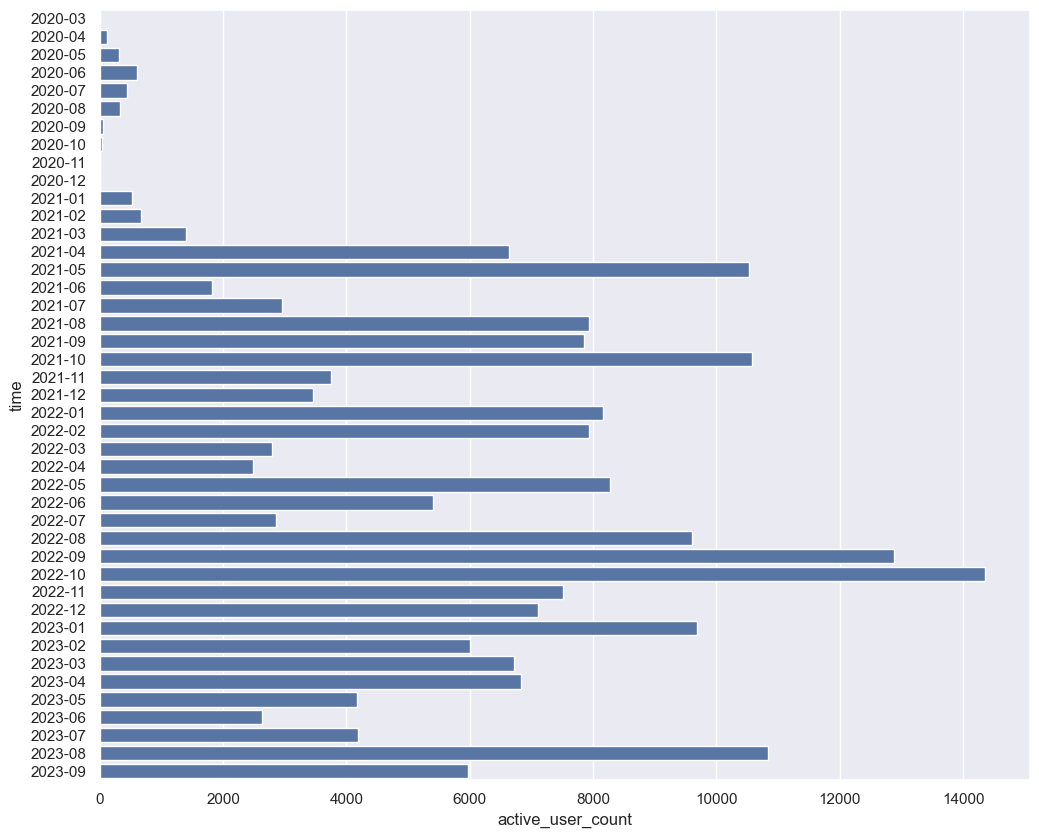

In [15]:
sns.barplot(x = 'active_user_count', y = 'time', data=active_user_count_ds, orient='h', estimator="sum", errorbar=None)

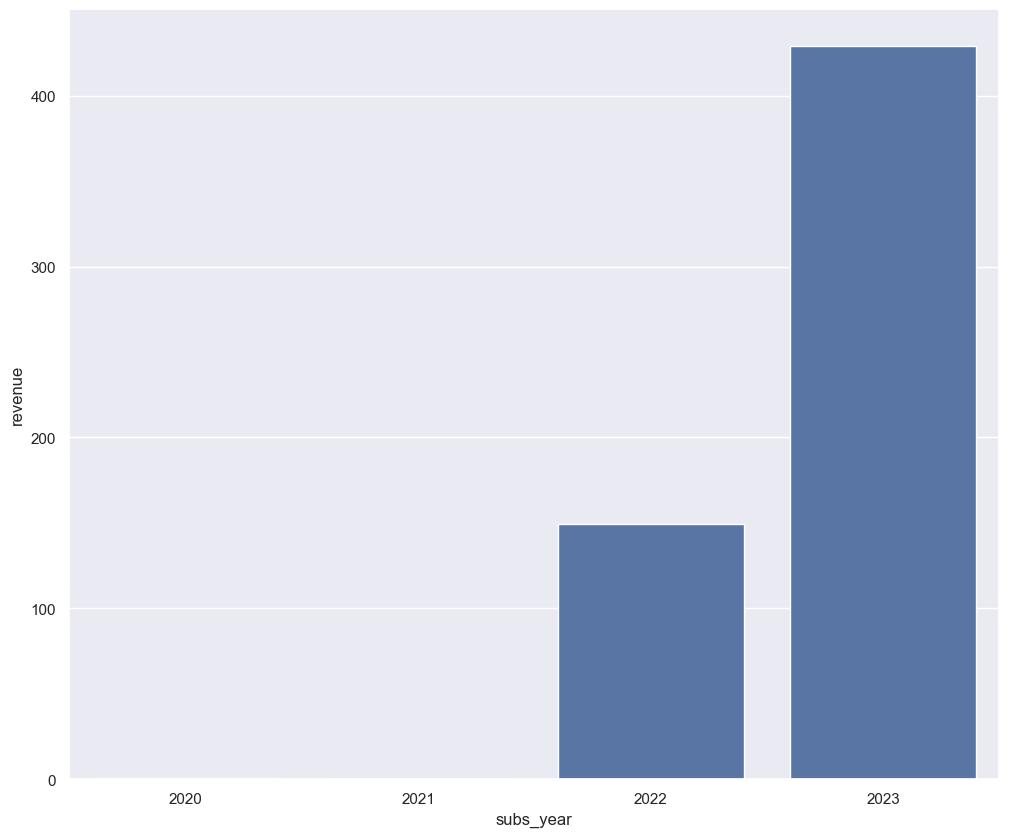

In [16]:
subscriptions_mds['subs_year'] = subscriptions_mds['subs_date'].dt.year
sns.barplot(x='subs_year',y='revenue',data=subscriptions_mds[['subs_year', 'revenue']].groupby('subs_year').mean().reset_index())
plt.show()

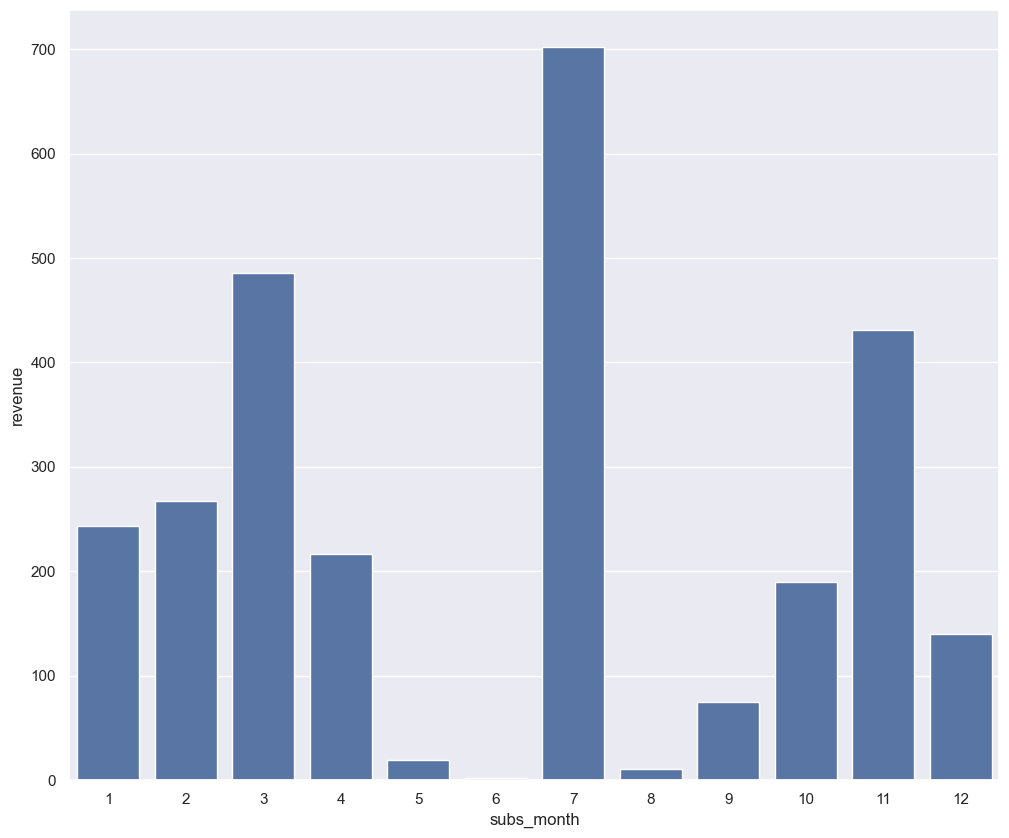

In [17]:
subscriptions_mds['subs_month'] = subscriptions_mds['subs_date'].dt.month
sns.barplot(x='subs_month',y='revenue',data=subscriptions_mds[['subs_month', 'revenue']].groupby('subs_month').mean().reset_index())
plt.show()

In [18]:
subscriptions_mds

,country,operator,source,msisdn,cycle,revenue,subs_date,renewal_date,freemium_end_date,unsubs_date,service_price,currency,attempt_charging,success_billing,subs_date_month,subs_date_hour,revenue_converted,service_price_converted,success_billing_rate,years_subscribed,status,source_encoded,country_encoded,operator_encoded,cycle_encoded,success_billing_rate_binned,subs_year,subs_month
0,TH,ais,sms,66988602911,daily,0.0,2022-10-20 19:28:02,2023-09-14 00:00:00,2022-10-20,NaT,6,BATH,15,0,10,19,0.0,2640.0,0.0,0.945723,1,7,3,0,0,bad,2022,10
1,TH,ais,sms,66822243080,daily,0.0,2020-08-23 16:11:02,2023-09-14 00:00:00,2020-08-23,NaT,6,BATH,15,0,8,16,0.0,2640.0,0.0,3.105002,1,7,3,0,0,bad,2020,8
3,TH,ais,wap,66650020857,daily,0.0,2023-09-09 13:03:24,2023-09-14 00:00:00,2023-09-09,NaT,6,BATH,5,0,9,13,0.0,2640.0,0.0,0.058783,1,8,3,0,0,bad,2023,9
4,TH,ais,sms,66635959286,daily,0.0,2022-09-26 19:36:03,2023-09-14 00:00:00,2022-09-26,NaT,6,BATH,15,0,9,19,0.0,2640.0,0.0,1.011461,1,7,3,0,0,bad,2022,9
5,TH,ais,sms,66931235277,daily,0.0,2021-08-06 16:27:07,2023-09-14 00:00:00,2021-08-06,NaT,6,BATH,15,0,8,16,0.0,2640.0,0.0,2.151547,1,7,3,0,0,bad,2021,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308906,OM,omantel,cp1,96898097014,daily,0.0,2023-05-11 09:50:11,2023-05-11 09:50:26,NaT,NaT,300,RIAL,1,0,5,9,0.0,1170000.0,0.0,0.390658,1,2,1,2,0,bad,2023,5
308907,OM,omantel,cp1,96872209910,daily,0.0,2023-05-11 09:49:50,2023-05-11 09:50:09,NaT,NaT,300,RIAL,1,0,5,9,0.0,1170000.0,0.0,0.390659,1,2,1,2,0,bad,2023,5
308908,OM,omantel,cp1,96891448321,daily,0.0,2023-05-11 06:15:24,2023-05-11 06:15:52,NaT,NaT,300,RIAL,1,0,5,6,0.0,1170000.0,0.0,0.391067,1,2,1,2,0,bad,2023,5
308909,OM,omantel,cp1,96891982806,daily,0.0,2023-05-11 16:44:57,2023-05-11 16:45:19,NaT,NaT,300,RIAL,1,0,5,16,0.0,1170000.0,0.0,0.389869,1,2,1,2,0,bad,2023,5


In [19]:
subscriptions_mds['subs_date_year'] = subscriptions_mds['subs_date'].dt.year
subscriptions_mds['subs_date_month'] = subscriptions_mds['subs_date'].dt.month
subscriptions_mds['subs_date_day'] = subscriptions_mds['subs_date'].dt.day

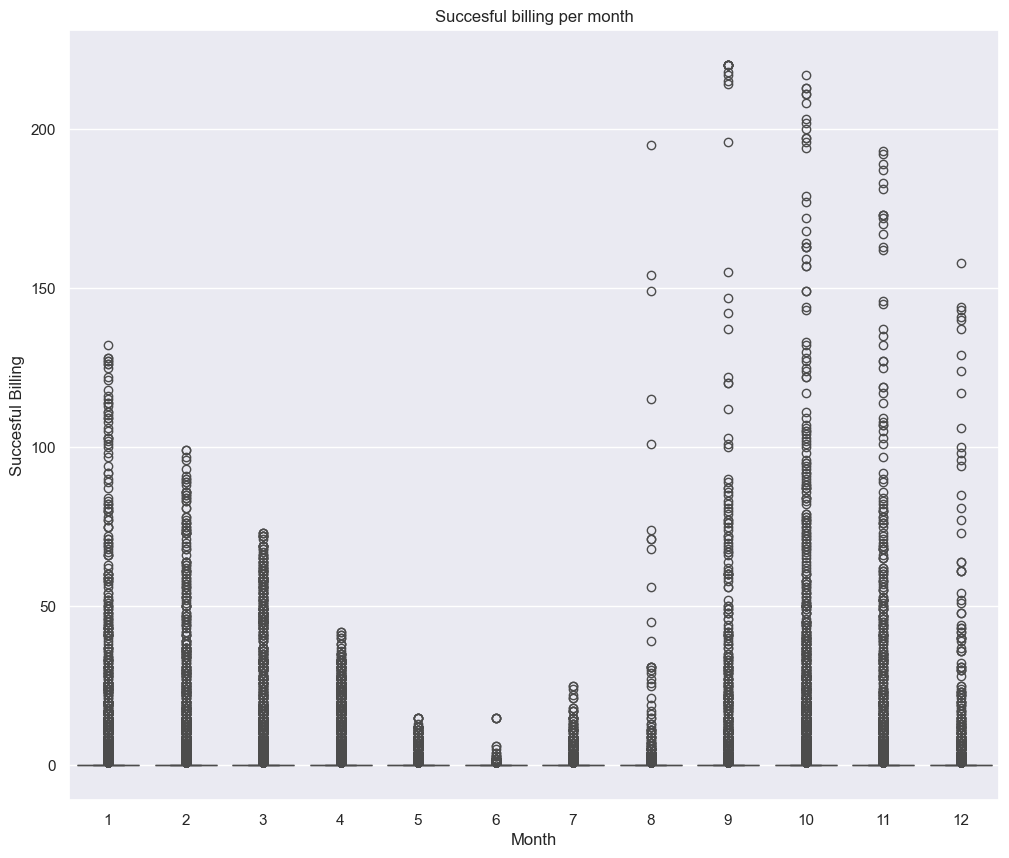

In [20]:
sns.boxplot(x='subs_date_month',y='success_billing',data=subscriptions_mds[['subs_date_month', 'success_billing']])
plt.title('Succesful billing per month')
plt.xlabel('Month')
plt.ylabel('Succesful Billing')
plt.show()

In [21]:
# sns.countplot(x='years_subscribed',data=subscriptions_mds.drop(subscriptions_mds[subscriptions_mds['years_subscribed'] == -1].index))
# plt.title('Duration of subscription')
# plt.xlabel('Years subscribed')

# plt.show()

In [22]:

sns.barplot(x='country',y='revenue',data=subscriptions_mds)

plt.title('Revenue generated from each countries')

plt.show()

# Transaction

In [ ]:
transactions_rds.columns

In [ ]:
transactions_rds[transactions_rds['sms_content'].notnull()][['sms_content']]

In [ ]:

transactions_rds[transactions_rds['telco_api_url'].notnull()][['telco_api_url']]

In [ ]:
transactions_mds = transactions_rds.drop(columns = ['currency', 'browser', 'handset','sms_content'])

In [ ]:
transactions_mds['event_date'] = pd.to_datetime(transactions_mds ['event_date'], errors='coerce')
transactions_mds['charge_date'] = pd.to_datetime(transactions_mds['charge_date'], errors='coerce')
transactions_mds['created_at'] = pd.to_datetime(transactions_mds['created_at'], errors='coerce')
transactions_mds['id'] = transactions_mds['id'].astype(int)
transactions_mds['status_sms'] = transactions_mds['status_sms'] == 1

transactions_mds['revenue'] = pd.to_numeric(transactions_mds['revenue'], errors='coerce', downcast='integer')
transactions_mds.dropna(subset=['revenue'], inplace=True)
transactions_mds = transactions_mds.astype({'revenue' : 'int32'})

In [ ]:
transactions_mds.dtypes

In [ ]:
transactions_rds.info()
transactions_rds[transactions_rds['sms_content'].notnull()]

In [ ]:
print(transactions_rds.columns)

In [ ]:
print(transactions_mds.columns)


In [ ]:
transactions_mds['country'].unique()

In [ ]:
transactions_mds['charge_month'] = transactions_mds['charge_date'].dt.month
sns.lineplot(x='charge_month',y='revenue',data=transactions_mds[['charge_month', 'revenue']].groupby('charge_month').mean().reset_index())
plt.show()

In [ ]:
sns.countplot(x='country',data=transactions_mds)
plt.title('Numbers of user for each country')
plt.show()


In [ ]:
sns.countplot(x='operator',data=transactions_mds)
plt.title('Numbers of user for each operator')
plt.show()

In [ ]:
sns.barplot(x='country',y='revenue',data=transactions_mds[['country', 'revenue']].groupby('country').mean().reset_index())
plt.show()

In [ ]:

transactions_mds.boxplot(by ='country', column =['revenue'], grid = False) 

In [ ]:
sns.barplot(x='operator',y='revenue',data=transactions_mds)
plt.show()